In [157]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

random seed set up

In [158]:
my_seed = 0
np.random.seed(my_seed)

some step1, step2

load data

In [159]:
raw_data = pd.read_excel('data.xlsx')
print(len(raw_data))
raw_data.head()

1045


,Unnamed: 0,Id,Name,Icon,Type(s),TotalBS,HP,Attack,Defense,Special Attack,Special Defense,Speed,Number of battles,Number of wins,Win rates
0,0,1,Bulbasaur,./pokemon_icons/1. Bulbasaur.jpg,"['GRASS', 'POISON']",318,45,49,49,65,65,45,3.0,2.0,0.666667
1,1,2,Ivysaur,./pokemon_icons/2. Ivysaur.jpg,"['GRASS', 'POISON']",405,60,62,63,80,80,60,33.0,25.0,0.757576
2,2,3,Venusaur,./pokemon_icons/3. Venusaur.jpg,"['GRASS', 'POISON']",525,80,82,83,100,100,80,184.0,127.0,0.690217
3,3,3,Mega Venusaur,./pokemon_icons/3. Mega Venusaur.jpg,"['GRASS', 'POISON']",625,80,100,123,122,120,80,NaN,NaN,NaN
4,4,4,Charmander,./pokemon_icons/4. Charmander.jpg,['FIRE'],309,39,52,43,60,50,65,9.0,7.0,0.777778


Ids, Names, Icons, Types are not needed 

In [160]:
data = raw_data
columns_to_drop = ['Unnamed: 0', 'Id', 'Name', 'Icon', 'Type(s)']
data.drop(labels=columns_to_drop, axis='columns', inplace=True)
data.head()

,TotalBS,HP,Attack,Defense,Special Attack,Special Defense,Speed,Number of battles,Number of wins,Win rates
0,318,45,49,49,65,65,45,3.0,2.0,0.666667
1,405,60,62,63,80,80,60,33.0,25.0,0.757576
2,525,80,82,83,100,100,80,184.0,127.0,0.690217
3,625,80,100,123,122,120,80,NaN,NaN,NaN
4,309,39,52,43,60,50,65,9.0,7.0,0.777778


data cleaning  
save nan into another dataframe  
kicking out less then 7 battles and 0 wins and 100% wins (ofc save to that dataframe too)

In [161]:
data.dropna(inplace=True)
print(len(data))
data.head()

720


,TotalBS,HP,Attack,Defense,Special Attack,Special Defense,Speed,Number of battles,Number of wins,Win rates
0,318,45,49,49,65,65,45,3.0,2.0,0.666667
1,405,60,62,63,80,80,60,33.0,25.0,0.757576
2,525,80,82,83,100,100,80,184.0,127.0,0.690217
4,309,39,52,43,60,50,65,9.0,7.0,0.777778
5,405,58,64,58,80,65,80,23.0,17.0,0.739130


In [133]:
data = data[ data['Number of battles'] >= 10 ]
data = data[ data['Win rates'] != 0 ]
data = data[ data['Win rates'] != 1 ]

print(len(data))
data.head()

430


,TotalBS,HP,Attack,Defense,Special Attack,Special Defense,Speed,Number of battles,Number of wins,Win rates
1,405,60,62,63,80,80,60,33.0,25.0,0.757576
2,525,80,82,83,100,100,80,184.0,127.0,0.690217
5,405,58,64,58,80,65,80,23.0,17.0,0.739130
6,534,78,84,78,109,85,100,189.0,129.0,0.682540
10,405,59,63,80,65,80,58,52.0,37.0,0.711538


plots

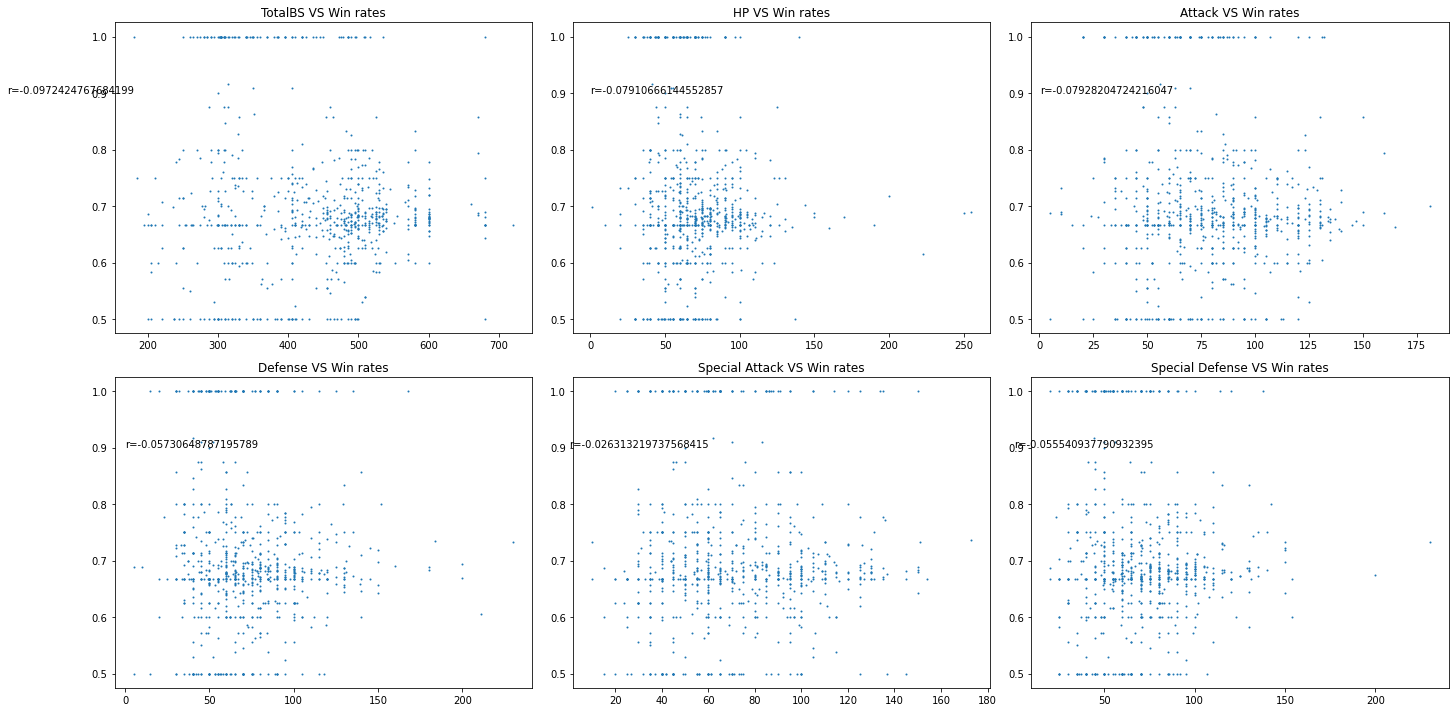

In [164]:
verus = ['TotalBS', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for i, ax in enumerate(axes.ravel()):
    ax.scatter(data[verus[i]], data['Win rates'], s=1)
    ax.set_title(verus[i] + ' VS ' + 'Win rates')
    r = np.corrcoef(data[verus[i]], data['Win rates'])[0][1]
    ax.text(0.1, 0.9, f'r={r}')

fig.tight_layout()

assigning X and y

In [98]:
X = data[['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']]
y = data['Win rates']

X = X.to_numpy(dtype=int, copy=True)
y = y.to_numpy(dtype=float, copy=True)

print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (720, 6)
y shape: (720,)


train test split

In [99]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=my_seed)

In [102]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(y_pred)

mean_squared_error(y_pred, y_test)

[0.70404371 0.70580023 0.70095949 0.71235065 0.71793738 0.72206591
 0.72715048 0.73752918 0.70453998 0.73313267 0.68128972 0.6927246
 0.67109784 0.69989958 0.67546614 0.72172652 0.67325865 0.69928386
 0.74655986 0.70253147 0.6871428  0.6743008  0.69688006 0.72269728
 0.70321896 0.7268599  0.70599836 0.69289632 0.68780806 0.72292642
 0.70667871 0.71567154 0.69827338 0.72283778 0.68891302 0.65580607
 0.7206774  0.68225339 0.68129645 0.72299174 0.68239288 0.71429799
 0.7031334  0.72111206 0.71390165 0.69769561 0.70089542 0.72287264
 0.73527327 0.70306871 0.67279675 0.71395958 0.68637124 0.71073389
 0.71891287 0.69361136 0.72642829 0.6790877  0.72423037 0.70980558
 0.72405734 0.68736766 0.74193211 0.70392733 0.70330199 0.73579832
 0.70219378 0.68087909 0.71295516 0.7227949  0.71070313 0.72713835
 0.72577417 0.6804125  0.71786598 0.70447226 0.68375134 0.68904153
 0.72202004 0.76233213 0.71106569 0.71615277 0.69067954 0.70549778
 0.7227995  0.71021505 0.69418449 0.69943081 0.69967327 0.70439

0.018699207750544504

In [103]:
lr.predict([[120, 140, 50, 40, 50, 110]])

array([0.65581653])

In [105]:
np.mean(y)

0.7056324991965568

In [106]:
np.mean(y_pred)

0.706389977948031

In [104]:
sum([120, 140, 50, 40, 50, 110])

510

k-fold

In [90]:
# k-fold function here
def k_fold(dataset: any, n_splits: int=5):
    choose_from = np.array_split(dataset, n_splits)
    for i, chuck in enumerate(choose_from): 
        # print(choose_from[:i].__len__(), choose_from[i+1:].__len__())
        training = np.concatenate(choose_from[:i] + choose_from[i+1:]) # TODO investigate np.concatenate() and flatten array
        yield (training, chuck)

def k_fold_training(X, y, model, loss_function, n_splits=5): 
    loss = 0
    for (X_train, X_validation), (y_train, y_validation) in zip(k_fold(X, n_splits), k_fold(y, n_splits)): 
        
        model.fit(X_train, y_train)

        try: 
            y_pred = model.predict(X_validation)
        except: 
            continue

        each_fold_loss = loss_function(y_pred, y_validation)
        loss += each_fold_loss

    print(f'K-Fold estimated loss: {loss/n_splits}')

In [91]:
k_fold_training(X_train, y_train, LinearRegression(), mean_squared_error)

K-Fold estimated loss: 0.006426491809183132
